# Color Compression Using Kmeans Clustering 

One interesting application of clustering is in color compression within images. For example, imagine you have an image with millions of colors. In most images, a large number of the colors will be unused, and many of the pixels in the image will have similar or even identical colors.

In [1]:
# base imports 
import numpy as np # matrix maths 
import matplotlib.pyplot as plt # plotting 
import seaborn as sns; sns.set() # styling our plots 

%matplotlib inline

/home/sanidhya/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/sanidhya/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


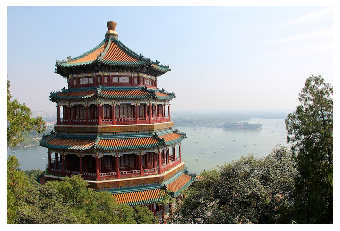

In [2]:
# load data set 
from sklearn.datasets import load_sample_image

china = load_sample_image('china.jpg') # loading a image named china 

# time to viz our image 
ax = plt.axes(xticks = [], yticks=[])
ax.imshow(china);

The image itself is stored in a 3D array of `([height, width,RGB])`, containing red/blue/green indicators as a range of integer from 0 to 255

In [3]:
# shape of image 
china.shape

(427, 640, 3)

One way we can view this set of pixels is as a cloud of points in a three-dimensional color space. We will reshape the data to `[n_samples x n_features]`, and rescale the colors so that they lie between 0 and 1:

In [5]:
data = china/255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3) # reshaping data 
data.shape # shape of data

(273280, 3)

We can visualize these pixels in this color space, using a subset of 10,000 pixels for efficiency:

In [10]:
# making a function to plot pixels 
def plot_pixels(data, title, colors=None,N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset 
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    
    R,G,B = data[i].T
    
    # plot 
    fig, ax = plt.subplots(1, 2, figsize=(16,6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
    
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
    fig.suptitle(title)

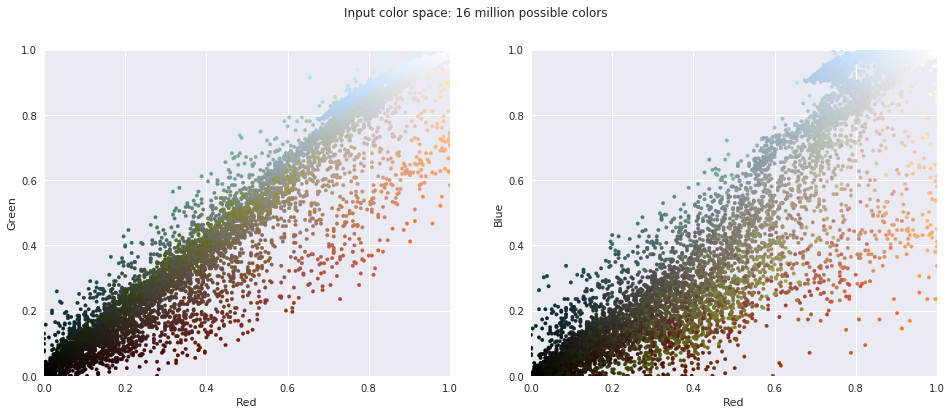

In [11]:
# plotting pixels 
plot_pixels(data,title='Input color space: 16 million possible colors')